In [42]:
import os
import cv2
import pandas as pd
import numpy as np

# Constants
BASE_PATH = 'C:/Users/DELL/Desktop/HR3/subject3'
VIDEO_FILE = 'C:/Users/DELL/Desktop/HR3/subject3/vid.avi'
GT_FILE = 'C:/Users/DELL/Desktop/HR3/subject3/ground_truth.txt'

# Function to check file existence
def check_file_exist(path: str):
    if not os.path.exists(path):
        raise Exception(f'Cannot find path: "{path}"')

# Function to extract video metadata
def metadata_video(path: str) -> dict:
    check_file_exist(path)
    metadata = {}
    video = cv2.VideoCapture(path)
    metadata['num_frames'] = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    metadata['height'] = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    metadata['width'] = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    metadata['frame_rate'] = video.get(cv2.CAP_PROP_FPS)
    metadata['duration'] = metadata['num_frames'] / metadata['frame_rate']
    video.release()
    return metadata

# Function to load video frames
def load_video_frames(path: str) -> list:
    check_file_exist(path)
    video = cv2.VideoCapture(path)
    frames = []
    ret, frame = video.read()
    while ret:
        frames.append(frame)
        ret, frame = video.read()
    video.release()
    return frames

# Function to process the video and extract faces
def process_video(video_path: str, gt_path: str):
    print(f"Processing video: {video_path}")

    # Read ground truth values from the file
    try:
        with open(gt_path, 'r') as file:
            gt_values = file.readline().strip().split()
            gt_values = list(map(float, gt_values))
        print(f"Ground truth values: {gt_values}")
    except Exception as e:
        print(f"Failed to read ground truth values from {gt_path}: {e}")
        return []

    cropped_faces = []
    frames = load_video_frames(video_path)

    for frame in frames:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        if face_cascade.empty():
            print("Failed to load face cascade classifier.")
            continue

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        print(f"Found {len(faces)} faces in a frame.")

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            cropped_faces.append(face)

    return cropped_faces

# Main processing
video_path = os.path.join(BASE_PATH, VIDEO_FILE)
gt_path = os.path.join(BASE_PATH, GT_FILE)

cropped_faces = process_video(video_path, gt_path)

print(f"Total cropped faces: {len(cropped_faces)}")


Processing video: C:/Users/DELL/Desktop/HR3/subject3/vid.avi
Ground truth values: [-0.45721051, -0.36997571, -0.33784818, -0.43885979, -0.66849175, -0.87971788, -1.0450397, -1.247118, -1.3481296, -1.4583441, -1.5593557, -1.2011585, -0.21843075, 0.83781012, 0.93882173, 0.4520593, -0.071459681, -0.3561989, -0.49396705, -0.46641342, -0.42050907, -0.38375253, -0.46641342, -0.64275666, -0.85216425, -1.017486, -1.1277006, -1.2379151, -1.3756832, -1.4951007, -1.5593557, -1.6567303, -1.7118375, -1.5465157, -0.55827722, 0.53472019, 1.0031319, 0.61738108, 0.19487371, -0.1027055, -0.3561989, -0.50316996, -0.48019024, -0.37454962, -0.3561989, -0.47561633, -0.69786392, -0.94402805, -1.1736049, -1.3260867, -1.3848861, -1.4307905, -1.4583441, -1.4399934, -1.3481296, -0.66849175, 0.13976645, 0.9112681, 1.3190618, 1.0765899, 0.58982745, 0.098436005, -0.13576985, -0.26433509, -0.16332349, -0.091684046, -0.1816742, -0.41130616, -0.62071375, -0.88892079, -1.2227055, -0.16332349, 0.83781012, 1.4623407, 1.4

In [43]:
print(cropped_faces)

[array([[[123, 140,  69],
        [123, 140,  69],
        [123, 140,  70],
        ...,
        [126, 143,  72],
        [126, 143,  72],
        [128, 143,  72]],

       [[123, 140,  69],
        [123, 140,  69],
        [124, 141,  71],
        ...,
        [126, 143,  72],
        [126, 143,  72],
        [127, 143,  69]],

       [[123, 140,  69],
        [123, 140,  69],
        [123, 140,  69],
        ...,
        [126, 143,  72],
        [126, 143,  72],
        [127, 143,  69]],

       ...,

       [[116, 129,  63],
        [115, 128,  62],
        [113, 127,  65],
        ...,
        [155, 158, 144],
        [154, 157, 143],
        [152, 159, 125]],

       [[116, 129,  64],
        [116, 129,  64],
        [114, 129,  64],
        ...,
        [163, 164, 155],
        [166, 167, 158],
        [163, 169, 152]],

       [[115, 129,  67],
        [115, 129,  67],
        [115, 130,  65],
        ...,
        [169, 169, 162],
        [172, 172, 165],
        [169, 172, 164]

In [44]:
def preprocess_images(images):
    IMG_HEIGHT = 64
    IMG_WIDTH = 64
    processed_images = []
    for img in images:
        img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        processed_images.append(img_resized)
    return np.array(processed_images)

# Preprocess the cropped face images
preprocessed_faces = preprocess_images(cropped_faces)


In [45]:
print(preprocessed_faces)


[[[[123 140  69]
   [125 142  72]
   [123 141  71]
   ...
   [125 143  69]
   [126 143  72]
   [126 143  71]]

  [[125 140  69]
   [125 140  69]
   [125 140  70]
   ...
   [126 143  73]
   [126 143  73]
   [128 143  71]]

  [[123 140  69]
   [125 141  67]
   [124 140  69]
   ...
   [126 142  74]
   [126 143  72]
   [125 143  73]]

  ...

  [[118 128  63]
   [116 128  64]
   [115 128  64]
   ...
   [119 133  74]
   [120 134  74]
   [122 137  73]]

  [[116 129  60]
   [114 128  66]
   [116 128  66]
   ...
   [153 158 138]
   [135 142 107]
   [130 141  97]]

  [[116 129  65]
   [114 129  64]
   [114 129  65]
   ...
   [187 187 182]
   [168 169 166]
   [167 169 159]]]


 [[[123 141  67]
   [124 141  70]
   [125 141  69]
   ...
   [126 143  72]
   [126 143  71]
   [127 144  70]]

  [[125 141  67]
   [124 142  68]
   [124 140  68]
   ...
   [126 143  73]
   [126 143  73]
   [126 143  72]]

  [[124 141  70]
   [124 141  67]
   [124 140  71]
   ...
   [127 144  73]
   [126 143  73]
   [126 143

In [46]:
# Convert to numpy array and normalize
X = np.array(preprocessed_faces).astype('float32') / 255.0


In [47]:
print(X)

[[[[0.48235294 0.54901963 0.27058825]
   [0.49019608 0.5568628  0.28235295]
   [0.48235294 0.5529412  0.2784314 ]
   ...
   [0.49019608 0.56078434 0.27058825]
   [0.49411765 0.56078434 0.28235295]
   [0.49411765 0.56078434 0.2784314 ]]

  [[0.49019608 0.54901963 0.27058825]
   [0.49019608 0.54901963 0.27058825]
   [0.49019608 0.54901963 0.27450982]
   ...
   [0.49411765 0.56078434 0.28627452]
   [0.49411765 0.56078434 0.28627452]
   [0.5019608  0.56078434 0.2784314 ]]

  [[0.48235294 0.54901963 0.27058825]
   [0.49019608 0.5529412  0.2627451 ]
   [0.4862745  0.54901963 0.27058825]
   ...
   [0.49411765 0.5568628  0.2901961 ]
   [0.49411765 0.56078434 0.28235295]
   [0.49019608 0.56078434 0.28627452]]

  ...

  [[0.4627451  0.5019608  0.24705882]
   [0.45490196 0.5019608  0.2509804 ]
   [0.4509804  0.5019608  0.2509804 ]
   ...
   [0.46666667 0.52156866 0.2901961 ]
   [0.47058824 0.5254902  0.2901961 ]
   [0.47843137 0.5372549  0.28627452]]

  [[0.45490196 0.5058824  0.23529412]
   [0.4

In [48]:
# Read ground truth values
gt_values = []
try:
    with open(gt_path, 'r') as file:
        gt_values = file.readline().strip().split()
        gt_values = list(map(float, gt_values))
except Exception as e:
    print(f"Failed to read ground truth values from {gt_path}: {e}")

# Ensure the ground truth values match the number of frames
if len(gt_values) != len(cropped_faces):
    raise Exception("The number of ground truth values does not match the number of cropped faces.")

# Convert ground truth values to numpy array and reshape
Y = np.array(gt_values).reshape(-1, 1)


In [49]:
print(Y)

[[-0.45721051]
 [-0.36997571]
 [-0.33784818]
 ...
 [-0.19087712]
 [-0.45263661]
 [-0.65928883]]


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [59]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 3  # Assuming RGB color images
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

# Assuming you have IMG_HEIGHT, IMG_WIDTH, and IMG_CHANNELS defined appropriately

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for a single value (heart rate)
    ])
    return model

# Example usage:
model = create_cnn_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Train the model with more epochs
# model.fit(...)



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:

# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 3.4559 - mae: 1.4619 - val_loss: 1.0012 - val_mae: 0.7807
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 1.2120 - mae: 0.8737 - val_loss: 1.0015 - val_mae: 0.7804
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 1.1223 - mae: 0.8451 - val_loss: 1.0037 - val_mae: 0.7815
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 1.1199 - mae: 0.8417 - val_loss: 1.0107 - val_mae: 0.7856
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 1.1374 - mae: 0.8518 - val_loss: 1.0398 - val_mae: 0.8084
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 1.0921 - mae: 0.8350 - val_loss: 1.0661 - val_mae: 0.8305
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 1.0491 - mae: 0.7997 - val_loss: 1.0849 - val_mae: 0.8444
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 1.0683 - mae: 0.8134 - val_loss: 1.0899 - val_mae: 0.8473
Epoch 9/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - lo

In [61]:
# Evaluate the model
loss, mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.0092 - mae: 0.8195
Test Loss: 1.0762662887573242, Test MAE: 0.8455071449279785


In [62]:
# Save the modela
model.save('heart_rate_detection_model.keras')


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


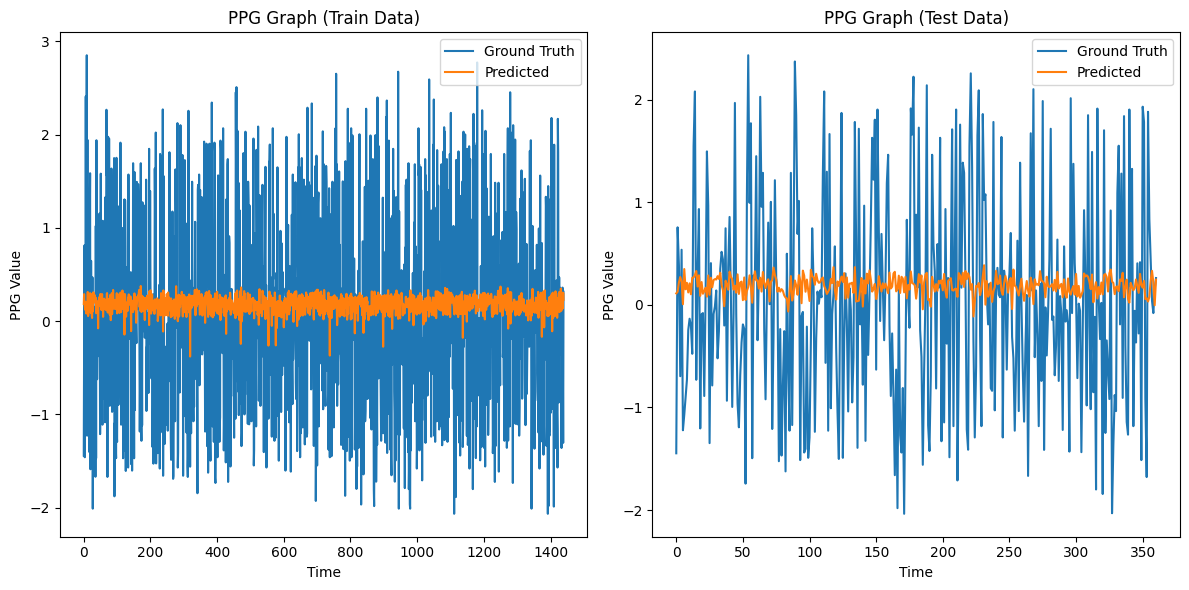

In [63]:
import matplotlib.pyplot as plt

# Assuming you have already trained and saved your model
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('heart_rate_detection_model.keras')

# Predict PPG values for train and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Plotting PPG graphs for train data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(Y_train, label='Ground Truth')
plt.plot(Y_train_pred, label='Predicted')
plt.title('PPG Graph (Train Data)')
plt.xlabel('Time')
plt.ylabel('PPG Value')
plt.legend()

# Plotting PPG graphs for test data
plt.subplot(1, 2, 2)
plt.plot(Y_test, label='Ground Truth')
plt.plot(Y_test_pred, label='Predicted')
plt.title('PPG Graph (Test Data)')
plt.xlabel('Time')
plt.ylabel('PPG Value')
plt.legend()

plt.tight_layout()
plt.show()
